In [29]:
!pip install youtube_transcript_api
from youtube_transcript_api import YouTubeTranscriptApi


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [88]:
# Import all necessary Libraries
import re
import spacy
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU, Embedding
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras_preprocessing.sequence import pad_sequences
from textblob.en import Spelling        
from textblob import TextBlob
from nltk import bigrams, trigrams
from collections import Counter, defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [31]:
# Access youtube video from video id from URL
youtube_link = "https://www.youtube.com/watch?v=vsZYupeZ9Ao&ab_channel=ALTEXTV"
# youtube_link = input('Enter youtube link:')
video_id = re.findall(r'v=[a-zA-Z0-9]+', youtube_link)[0][2:]
print(youtube_link, video_id)

https://www.youtube.com/watch?v=vsZYupeZ9Ao&ab_channel=ALTEXTV vsZYupeZ9Ao


In [32]:
# Get the transcript from youtube video
youtube_api = YouTubeTranscriptApi.get_transcript(video_id)
print(youtube_api)

[{'text': 'our scene alive is a new action movie', 'start': 0.08, 'duration': 4.32}, {'text': 'that is coming to the big screen for you', 'start': 2.48, 'duration': 3.68}, {'text': 'all to go and check out this movie stars', 'start': 4.4, 'duration': 3.84}, {'text': 'gerard butler and if you guys know his', 'start': 6.16, 'duration': 3.6}, {'text': "movie you know pretty much what you're", 'start': 8.24, 'duration': 5.2}, {'text': 'gonna get this movie we follow him as he', 'start': 9.76, 'duration': 5.919}, {'text': 'is looking for his wife who has been', 'start': 13.44, 'duration': 4.08}, {'text': 'kidnapped', 'start': 15.679, 'duration': 3.121}, {'text': 'and', 'start': 17.52, 'duration': 3.519}, {'text': "he's gone to do it by himself it's red", 'start': 18.8, 'duration': 3.68}, {'text': "bench phil so i'm going to tell you guys", 'start': 21.039, 'duration': 2.641}, {'text': 'my thoughts on this movie let me know in', 'start': 22.48, 'duration': 2.32}, {'text': 'the comments below

In [33]:
# Extract the text and concat
youtube_text = " ".join([item['text'].lower() for item in youtube_api])
print(youtube_text)

our scene alive is a new action movie that is coming to the big screen for you all to go and check out this movie stars gerard butler and if you guys know his movie you know pretty much what you're gonna get this movie we follow him as he is looking for his wife who has been kidnapped and he's gone to do it by himself it's red bench phil so i'm going to tell you guys my thoughts on this movie let me know in the comments below what do you guys think of this movie or if you haven't seen it what are your thoughts on the trailer are you excited smash it down below smash that like button click subscribe and let's jump into this review of last scene alive okay so last scene alive is a revenge field that's to its core that's what this film is it's a complete and utter revenge film so me i'm a sucker for those revenge fields so i mean we got john wick john wick's a classic revenge film we've got rambo revenge films we've got all these other revenge films and i'm pretty sure most people enjoy t

In [34]:
# Tokenization with NLTK's tokenizer
tokens = word_tokenize(youtube_text)
print(tokens)

['our', 'scene', 'alive', 'is', 'a', 'new', 'action', 'movie', 'that', 'is', 'coming', 'to', 'the', 'big', 'screen', 'for', 'you', 'all', 'to', 'go', 'and', 'check', 'out', 'this', 'movie', 'stars', 'gerard', 'butler', 'and', 'if', 'you', 'guys', 'know', 'his', 'movie', 'you', 'know', 'pretty', 'much', 'what', 'you', "'re", 'gon', 'na', 'get', 'this', 'movie', 'we', 'follow', 'him', 'as', 'he', 'is', 'looking', 'for', 'his', 'wife', 'who', 'has', 'been', 'kidnapped', 'and', 'he', "'s", 'gone', 'to', 'do', 'it', 'by', 'himself', 'it', "'s", 'red', 'bench', 'phil', 'so', 'i', "'m", 'going', 'to', 'tell', 'you', 'guys', 'my', 'thoughts', 'on', 'this', 'movie', 'let', 'me', 'know', 'in', 'the', 'comments', 'below', 'what', 'do', 'you', 'guys', 'think', 'of', 'this', 'movie', 'or', 'if', 'you', 'have', "n't", 'seen', 'it', 'what', 'are', 'your', 'thoughts', 'on', 'the', 'trailer', 'are', 'you', 'excited', 'smash', 'it', 'down', 'below', 'smash', 'that', 'like', 'button', 'click', 'subscribe

In [35]:
# Count tokens frequencies
freq = nltk.FreqDist(tokens)
for key, val in freq.items():
  print(str(key) + ':' + str(val))

our:4
scene:4
alive:3
is:29
a:23
new:1
action:5
movie:11
that:46
coming:2
to:36
the:45
big:1
screen:2
for:11
you:33
all:7
go:7
and:61
check:1
out:3
this:26
stars:1
gerard:1
butler:3
if:2
guys:7
know:9
his:7
pretty:2
much:4
what:25
're:8
gon:4
na:4
get:4
we:16
follow:2
him:11
as:13
he:28
looking:1
wife:3
who:1
has:5
been:1
kidnapped:1
's:51
gone:2
do:21
it:56
by:1
himself:1
red:1
bench:1
phil:1
so:19
i:35
'm:4
going:9
tell:4
my:5
thoughts:2
on:8
let:3
me:6
in:10
comments:2
below:4
think:3
of:16
or:4
have:4
n't:12
seen:1
are:6
your:2
trailer:1
excited:1
smash:4
down:3
like:24
button:2
click:2
subscribe:2
jump:1
into:2
review:1
last:2
okay:2
revenge:8
field:1
its:2
core:1
film:11
complete:1
utter:1
sucker:1
those:1
fields:2
mean:3
got:4
john:2
wick:2
classic:1
've:2
rambo:1
films:5
these:13
other:1
sure:1
most:1
people:1
enjoy:2
them:7
because:5
they:23
just:16
fun:7
entertainment:1
see:9
good:4
absolutely:1
murder:1
bad:1
dna:1
nature:1
want:1
when:3
put:2
jared:2
angel:1
fallen:2
whole:

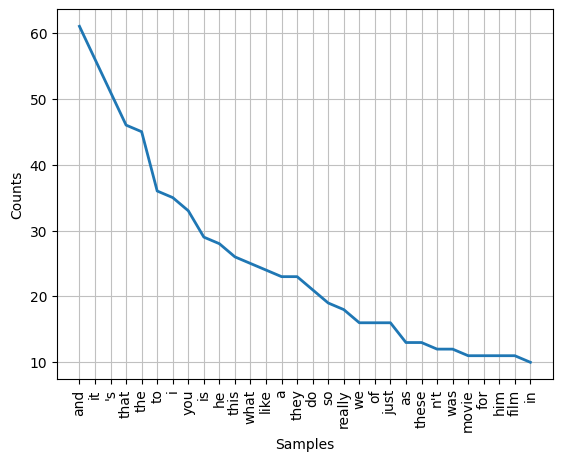

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [36]:
# Draw diagram before normalization
freq.plot(30, cumulative=False)

In [37]:
# List all Stop Words
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sanjib.paudel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
# Remove stopwords
clean_tokens = tokens[:]
sr = stopwords.words('english')
for token in tokens:
  if token in sr:
    clean_tokens.remove(token)

In [39]:
# Use regex to select only words with three or more characters
clean_text = " ".join(clean_tokens)
re_pattern = r'[a-z][a-z][a-z]+'
clean_tokens = re.findall(re_pattern, clean_text)
print(clean_tokens)

['scene', 'alive', 'new', 'action', 'movie', 'coming', 'big', 'screen', 'check', 'movie', 'stars', 'gerard', 'butler', 'guys', 'know', 'movie', 'know', 'pretty', 'much', 'gon', 'get', 'movie', 'follow', 'looking', 'wife', 'kidnapped', 'gone', 'red', 'bench', 'phil', 'going', 'tell', 'guys', 'thoughts', 'movie', 'let', 'know', 'comments', 'guys', 'think', 'movie', 'seen', 'thoughts', 'trailer', 'excited', 'smash', 'smash', 'like', 'button', 'click', 'subscribe', 'let', 'jump', 'review', 'last', 'scene', 'alive', 'okay', 'last', 'scene', 'alive', 'revenge', 'field', 'core', 'film', 'complete', 'utter', 'revenge', 'film', 'sucker', 'revenge', 'fields', 'mean', 'got', 'john', 'wick', 'john', 'wick', 'classic', 'revenge', 'film', 'got', 'rambo', 'revenge', 'films', 'got', 'revenge', 'films', 'pretty', 'sure', 'people', 'enjoy', 'much', 'fun', 'much', 'entertainment', 'like', 'see', 'good', 'guys', 'absolutely', 'murder', 'bad', 'guys', 'dna', 'nature', 'want', 'see', 'put', 'jared', 'butler

In [40]:
# Lemmetize words with WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
lemma_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
print(lemma_tokens)

['scene', 'alive', 'new', 'action', 'movie', 'coming', 'big', 'screen', 'check', 'movie', 'star', 'gerard', 'butler', 'guy', 'know', 'movie', 'know', 'pretty', 'much', 'gon', 'get', 'movie', 'follow', 'looking', 'wife', 'kidnapped', 'gone', 'red', 'bench', 'phil', 'going', 'tell', 'guy', 'thought', 'movie', 'let', 'know', 'comment', 'guy', 'think', 'movie', 'seen', 'thought', 'trailer', 'excited', 'smash', 'smash', 'like', 'button', 'click', 'subscribe', 'let', 'jump', 'review', 'last', 'scene', 'alive', 'okay', 'last', 'scene', 'alive', 'revenge', 'field', 'core', 'film', 'complete', 'utter', 'revenge', 'film', 'sucker', 'revenge', 'field', 'mean', 'got', 'john', 'wick', 'john', 'wick', 'classic', 'revenge', 'film', 'got', 'rambo', 'revenge', 'film', 'got', 'revenge', 'film', 'pretty', 'sure', 'people', 'enjoy', 'much', 'fun', 'much', 'entertainment', 'like', 'see', 'good', 'guy', 'absolutely', 'murder', 'bad', 'guy', 'dna', 'nature', 'want', 'see', 'put', 'jared', 'butler', 'know', '

In [41]:
# Count the frequencies of words after normalizations
lemma_tokens_freq = nltk.FreqDist(lemma_tokens)
for key, val in lemma_tokens_freq.items():
  print(str(key) + ':' + str(val))

scene:4
alive:3
new:1
action:6
movie:13
coming:2
big:1
screen:2
check:1
star:1
gerard:1
butler:3
guy:11
know:9
pretty:2
much:4
gon:4
get:5
follow:2
looking:1
wife:3
kidnapped:1
gone:2
red:1
bench:1
phil:1
going:9
tell:4
thought:4
let:3
comment:2
think:3
seen:1
trailer:1
excited:1
smash:4
like:24
button:2
click:2
subscribe:2
jump:1
review:1
last:2
okay:2
revenge:8
field:3
core:1
film:16
complete:1
utter:1
sucker:1
mean:3
got:4
john:2
wick:2
classic:1
rambo:1
sure:1
people:1
enjoy:2
fun:7
entertainment:1
see:9
good:4
absolutely:1
murder:1
bad:1
dna:1
nature:1
want:2
put:2
jared:2
angel:1
fallen:2
whole:5
trilogy:1
modern:1
day:1
liam:2
neeson:2
little:1
lower:1
budget:7
one:4
used:1
sort:1
category:1
different:1
lot:3
heart:2
way:1
started:1
pull:1
strength:1
character:5
actually:4
felt:1
fantastic:1
job:2
humanizing:2
point:1
terrible:3
husband:2
human:2
even:1
especially:1
skilled:1
anything:5
regular:1
real:2
estate:2
agent:3
well:9
showed:2
background:2
move:1
forward:1
relationship:

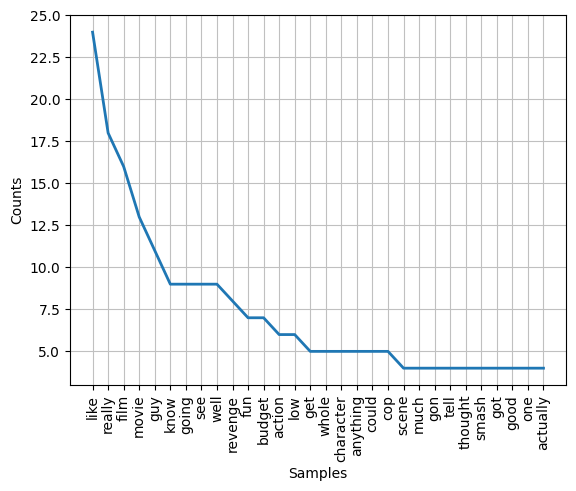

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [42]:
# Draw the graph after normalization
lemma_tokens_freq.plot(30, cumulative=False)

In [43]:
# Methods to clean, create sequence and encode for sentences
# Clean word for sentences
def text_cleaner(text):
    # lower case text
    newString = text.lower()
    newString = re.sub(r"'s\b","",newString)
    # remove punctuations
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    long_words=[]
    # remove short word
    for i in newString.split():
        if len(i)>=3:                  
            long_words.append(i)
    return (" ".join(long_words)).strip()

# Create a sequence os words
def create_seq(text):
    length = 30
    sequences = list()
    for i in range(length, len(text)):
        # select sequence of tokens
        seq = text[i-length:i+1]
        # store
        sequences.append(seq)
    print('Total Sequences: %d' % len(sequences))
    return sequences

# Encode sequences
def encode_seq(seq):
    sequences = list()
    for line in seq:
#         print([mapping[char] for char in line])
        # integer encode line
        encoded_seq = [mapping[char] for char in line]
        # store
        sequences.append(encoded_seq)
    return sequences

In [44]:
clean_summary = text_cleaner(youtube_text) # generate clean summary without 
seq_summary = create_seq(clean_summary) # generate clean summary sequence
chars = sorted(list(set(clean_summary)))
mapping = dict((c, i) for i, c in enumerate(chars))
encoded_seq = encode_seq(seq_summary) # generate clean summary encode
print(encoded_seq[:10])

Total Sequences: 5878
[[15, 21, 18, 0, 19, 3, 5, 14, 5, 0, 1, 12, 9, 22, 5, 0, 14, 5, 23, 0, 1, 3, 20, 9, 15, 14, 0, 13, 15, 22, 9], [21, 18, 0, 19, 3, 5, 14, 5, 0, 1, 12, 9, 22, 5, 0, 14, 5, 23, 0, 1, 3, 20, 9, 15, 14, 0, 13, 15, 22, 9, 5], [18, 0, 19, 3, 5, 14, 5, 0, 1, 12, 9, 22, 5, 0, 14, 5, 23, 0, 1, 3, 20, 9, 15, 14, 0, 13, 15, 22, 9, 5, 0], [0, 19, 3, 5, 14, 5, 0, 1, 12, 9, 22, 5, 0, 14, 5, 23, 0, 1, 3, 20, 9, 15, 14, 0, 13, 15, 22, 9, 5, 0, 20], [19, 3, 5, 14, 5, 0, 1, 12, 9, 22, 5, 0, 14, 5, 23, 0, 1, 3, 20, 9, 15, 14, 0, 13, 15, 22, 9, 5, 0, 20, 8], [3, 5, 14, 5, 0, 1, 12, 9, 22, 5, 0, 14, 5, 23, 0, 1, 3, 20, 9, 15, 14, 0, 13, 15, 22, 9, 5, 0, 20, 8, 1], [5, 14, 5, 0, 1, 12, 9, 22, 5, 0, 14, 5, 23, 0, 1, 3, 20, 9, 15, 14, 0, 13, 15, 22, 9, 5, 0, 20, 8, 1, 20], [14, 5, 0, 1, 12, 9, 22, 5, 0, 14, 5, 23, 0, 1, 3, 20, 9, 15, 14, 0, 13, 15, 22, 9, 5, 0, 20, 8, 1, 20, 0], [5, 0, 1, 12, 9, 22, 5, 0, 14, 5, 23, 0, 1, 3, 20, 9, 15, 14, 0, 13, 15, 22, 9, 5, 0, 20, 8, 1, 20, 0, 3], [0, 

In [45]:
# Sentence tokenization using Spacy
nlp = spacy.load('en_core_web_sm')
spacy_doc = nlp(clean_summary)
sentences = [sentence.lemma_.lower().strip() for sentence in spacy_doc.sents]
# sentences = [word.lemma_.lower().strip() for word in spacy_doc.sents if word not in sr]
print("Number of sentences: ", len(sentences))
print(sentences)

Number of sentences:  9
['our scene alive new action movie that come the big screen for you all and check out this movie star gerard butler and you guy know his movie you know pretty much what you goto get this movie follow he look for his wife who have be kidnap and go himself red bench phil going tell you guy thought this movie let know the comment below what you guy think this movie you haven see what be your thought the trailer be you excited smash down below smash that like button click subscribe and let jump into this review last scene alive okay last scene alive revenge field that its core that what this film complete and utter revenge film sucker for those revenge field mean get john wick john wick classic revenge film get rambo revenge film get all these other revenge film and pretty sure most people enjoy they because they just much fun and much entertainment and like see the good guy absolutely murder bad guy just our dna our nature that what want see when you put jar butler

In [55]:
# Create a summary with clean sentences
sentenceValue = {}
for sentence in sentences:
  for word, freq in lemma_tokens_freq.items():
    if word in sentence:
        if sentence in sentenceValue:
            sentenceValue[sentence] += freq
        else :
            sentenceValue[sentence] = freq
sumValues = 0
for sentence in sentenceValue:
    sumValues += sentenceValue[sentence]
average = int(sumValues / len(sentenceValue))

summary = ''
for sentence in sentences:
    if (sentence in sentenceValue) and(sentenceValue[sentence] > (2.9 * average)):
        summary += "" + sentence
print(summary)

our scene alive new action movie that come the big screen for you all and check out this movie star gerard butler and you guy know his movie you know pretty much what you goto get this movie follow he look for his wife who have be kidnap and go himself red bench phil going tell you guy thought this movie let know the comment below what you guy think this movie you haven see what be your thought the trailer be you excited smash down below smash that like button click subscribe and let jump into this review last scene alive okay last scene alive revenge field that its core that what this film complete and utter revenge film sucker for those revenge field mean get john wick john wick classic revenge film get rambo revenge film get all these other revenge film and pretty sure most people enjoy they because they just much fun and much entertainment and like see the good guy absolutely murder bad guy just our dna our nature that what want see when you put jar butler you know what you go get 

In [50]:
# textToLower = ""

# # with open("corpus.txt","r") as f1:           # Open our source file
# #     text = f1.read()                                  # Read the file                 
# #     textToLower = text.lower()                        # Lower all the capital letters

# words = re.findall("[a-z]+", youtube_text)             # Find all the words and place them into a list    
# oneString = " ".join(words)                           # Join them into one string

# pathToFile = "train.txt"                              # The path we want to store our stats file at
# spelling = Spelling(path = pathToFile)                # Connect the path to the Spelling object
# spelling.train(oneString, pathToFile)  

In [51]:
# pathToFile = "train.txt" 
# spelling = Spelling(path = pathToFile)
# text = " "


# words = summary.split(" ")
# corrected_summary = " "
# for i in words:
#     corrected_summary = corrected_summary +" "+ spelling.suggest(i)[0][0] # Spell checking word by word

# print(corrected_summary)

In [105]:
# # Create Traning and Validation Set
# # vocabulary size
# vocab = len(mapping)
# dataset = np.array(encoded_seq)
# # create X and y
# X, y = dataset[:,:-1], dataset[:,-1]
# # one hot encode y
# y = to_categorical(y, num_classes=vocab)
# # create train and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# print('Train shape:', X_train.shape, 'Val shape:', X_val.shape)

In [106]:
# # Model Building
# # define model
# model = Sequential()
# model.add(Embedding(vocab, 60, input_length=30, trainable=True))
# model.add(GRU(150, recurrent_dropout=0.1, dropout=0.1))
# model.add(Dense(vocab, activation='softmax'))
# print(model.summary())

# # compile the model
# model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')
# # fit the model
# model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_val, y_val))

In [62]:
# # generate a sequence of characters with a language model
# def generate_seq(model, mapping, seq_length, seed_text, n_chars):
#     in_text = seed_text
#     # generate a fixed number of characters
#     for _ in range(n_chars):
#         # encode the characters as integers
#         encoded = [mapping[char] for char in in_text]
#         # truncate sequences to a fixed length
#         encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
#         # predict character
# #         yhat = model.predict_classes(encoded, verbose=0)
#         yhat = np.argmax(model.predict(encoded), axis=-1)
#         # reverse map integer to character
#         out_char = ''
#         for char, index in mapping.items():
#             if index == yhat:
#                 out_char = char
#                 break
#         # append to input
#         in_text += char
#     return in_text

In [63]:
# generated_text = generate_seq(model, mapping, 30, "movie", 15)
# print(generated_text)

In [64]:
# # Import required libraries
# import torch
# from pytorch_transformers import GPT2Tokenizer, GPT2LMHeadModel

# # Load pre-trained model tokenizer (vocabulary)
# tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# generated_sentence = ""
# for sentence in sentences:
#     print(sentence.split(" ")[0])
#     text = sentence.split(" ")[0] + " movie"
#     predicted_text = ""
#     while "." not in predicted_text:
#         # Encode a text inputs
#         if predicted_text != "":
#             text = predicted_text

#         indexed_tokens = tokenizer.encode(text)

#         # Convert indexed tokens in a PyTorch tensor
#         tokens_tensor = torch.tensor([indexed_tokens])

#         # Load pre-trained model (weights)
#         model = GPT2LMHeadModel.from_pretrained('gpt2')

#         # Set the model in evaluation mode to deactivate the DropOut modules
#         model.eval()

#         # If you have a GPU, put everything on cuda
#         if(torch.cuda.is_available()):
#             tokens_tensor = tokens_tensor.to('cuda')
#             model.to('cuda')

#         # Predict all tokens
#         with torch.no_grad():
#             outputs = model(tokens_tensor)
#             predictions = outputs[0]

#         # Get the predicted next sub-word
#         predicted_index = torch.argmax(predictions[0, -1, :]).item()
#         predicted_text = tokenizer.decode(indexed_tokens + [predicted_index])
# #         print(predicted_index, predicted_text)
#     generated_sentence += predicted_text

# # Print the predicted word
# print(generated_sentence)

In [107]:
# from nltk.corpus import movie_reviews
# nltk.download('movie_reviews')

In [108]:
# def countFreq(model):
#     for sentence in movie_reviews.sents():
#         for w1, w2, w3 in trigrams(sentence, pad_right=True, pad_left=True):
#             model[(w1, w2)][w3] += 1
#     return model
 
# def getProbability(model):
#     for w1_w2 in model:
#         total_count = float(sum(model[w1_w2].values()))
#         for w3 in model[w1_w2]:
#             model[w1_w2][w3] /= total_count
            
# # Create a placeholder for model
# model = defaultdict(lambda: defaultdict(lambda: 0))
# countFreq(model)
# getProbability(model)

In [109]:
# dict(model["movie", "review"])

In [76]:
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [77]:
# Import IMDB datasets
# https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
df = pd.read_csv("dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [78]:
df['review'].iloc[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [79]:
# Preprocessing
df['target'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [80]:
df.sample(3)

,review,sentiment,target
48842,I should have trusted my instincts better: No ...,negative,0
46597,"Seeing as the vote average was pretty low, and...",positive,1
48139,It seems that some viewers assume that the onl...,negative,0


In [81]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [82]:
df.shape

(50000, 3)

In [84]:
# Lemmatization
# Remove punctuations, next line character, break line character
# Next Line character
def preprocess(text):
    doc = nlp(text)
    preprocessed_text = [token.lemma_ for token in doc if not token.is_punct and 
                         token.text != ' ' and token.text != '\n' and token.text != '<br />' 
                         and token.text != '<br/>']
    return " ".join(preprocessed_text)

In [85]:
df['preprocessed_review'] = df['review'].apply(preprocess)

In [101]:
# Split Datasets between training(80%) and testing(20%)
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['target'], test_size=0.2)

In [87]:
X_train.shape

(40000,)

In [89]:
nbpl = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('naive_bayes', MultinomialNB())
])

In [90]:
# Model Training
nbpl.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('naive_bayes', MultinomialNB())])

In [91]:
# Testing the model
y_pred = nbpl.predict(X_test)

In [103]:
# nbpl.predict(summary)
# nbpl.predict(X_test)

In [93]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      4987
           1       0.87      0.82      0.84      5013

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [94]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfpl = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('random_classifier', RandomForestClassifier(n_estimators=50, criterion='entropy'))
])

In [95]:
# Model training
rfpl.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('random_classifier',
                 RandomForestClassifier(criterion='entropy', n_estimators=50))])

In [96]:
# testing the model
y_pred = rfpl.predict(X_test)

In [97]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4987
           1       0.85      0.85      0.85      5013

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [104]:
# print(y_pred)
# rfpl.predict(summary)